In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [8]:
dados_xlsx = pd.ExcelFile('TCC DADOS2.xlsx')

# Lê um CSV
dados_csv = pd.read_csv('posicoes_csv.csv')

In [9]:
print("Planilhas disponíveis:", dados_xlsx.sheet_names)
print("Primeiras linhas do CSV:\n", dados_csv.head())


Planilhas disponíveis: ['DimQueen', 'Planilha2', 'DimFranquia', 'DimCidade', 'DimEpisodio', 'DimCategoriaEp', 'DimTemporada', 'FatoHistorico']
Primeiras linhas do CSV:
    id_queen               nome  colocacao  episodio  wins  highs  safe  low  \
0         1  BeBe Zahara Benet          1         1     0      0     1    0   
1         1  BeBe Zahara Benet          1         2     0      0     2    0   
2         1  BeBe Zahara Benet          1         3     1      0     2    0   
3         1  BeBe Zahara Benet          1         4     1      1     2    0   
4         1  BeBe Zahara Benet          1         5     1      1     2    0   

   bttm  elim  cidade  num_conf  
0     0     0     NaN       NaN  
1     0     0     NaN       NaN  
2     0     0     NaN       NaN  
3     0     0     NaN       NaN  
4     1     0     NaN       NaN  


In [14]:
dim_queen = dados_xlsx.parse('DimQueen')
print("Primeiras linhas da DimQueen:\n", dim_queen.head())

Primeiras linhas da DimQueen:
    ID Nome da Participante  Idade  Colocação           Cidade      Estado  \
0   1    BeBe Zahara Benet     28          1      Minneapolis   Minnesota   
1   2         Nina Flowers     34          2           Denver    Colorado   
2   3    Rebecca Glasscock     26          3  Fort Lauderdale     Flórida   
3   4              Shannel     29          4        Las Vegas      Nevada   
4   5               Ongina     26          5      Los Angeles  Califórnia   

   Temporada  Franquia  
0        1.0         1  
1        1.0         1  
2        1.0         1  
3        1.0         1  
4        1.0         1  


In [15]:
dados_completos = pd.merge(dados_csv, dim_queen, left_on='id_queen', right_on='ID', how='left')
print("Dados combinados (amostra):\n", dados_completos.head())

Dados combinados (amostra):
    id_queen               nome  colocacao  episodio  wins  highs  safe  low  \
0         1  BeBe Zahara Benet          1         1     0      0     1    0   
1         1  BeBe Zahara Benet          1         2     0      0     2    0   
2         1  BeBe Zahara Benet          1         3     1      0     2    0   
3         1  BeBe Zahara Benet          1         4     1      1     2    0   
4         1  BeBe Zahara Benet          1         5     1      1     2    0   

   bttm  elim  cidade  num_conf  ID Nome da Participante  Idade  Colocação  \
0     0     0     NaN       NaN   1    BeBe Zahara Benet     28          1   
1     0     0     NaN       NaN   1    BeBe Zahara Benet     28          1   
2     0     0     NaN       NaN   1    BeBe Zahara Benet     28          1   
3     0     0     NaN       NaN   1    BeBe Zahara Benet     28          1   
4     1     0     NaN       NaN   1    BeBe Zahara Benet     28          1   

        Cidade     Estado  

In [16]:
dados_completos['ganhou'] = dados_completos['Colocação'].apply(lambda x: 1 if x == 1 else 0)


In [17]:
features = ['Idade', 'wins', 'highs', 'safe', 'low', 'bttm', 'elim']
dados_completos[features] = dados_completos[features].fillna(0)

In [18]:
X = dados_completos[features]
y = dados_completos['ganhou']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10 Treinar Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 11 Fazer previsões e avaliar
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia final do modelo: {:.2f}%".format(acuracia * 100))


Acurácia final do modelo: 96.15%


In [22]:
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       826
           1       0.74      0.61      0.67        56

    accuracy                           0.96       882
   macro avg       0.86      0.80      0.82       882
weighted avg       0.96      0.96      0.96       882



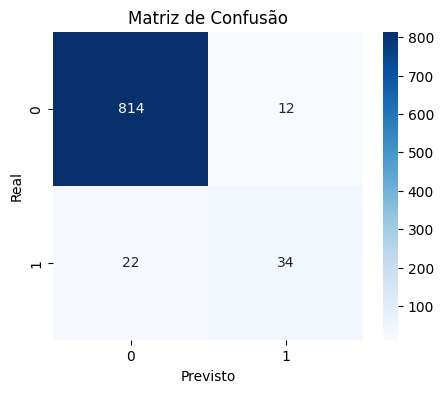

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [24]:
importancias = pd.DataFrame({'Feature': features, 'Importância': modelo.feature_importances_})
importancias = importancias.sort_values(by='Importância', ascending=False)
print("Importância das variáveis:\n", importancias)

Importância das variáveis:
   Feature  Importância
0   Idade     0.318561
1    wins     0.240567
2   highs     0.153226
3    safe     0.112501
6    elim     0.060246
4     low     0.059852
5    bttm     0.055048


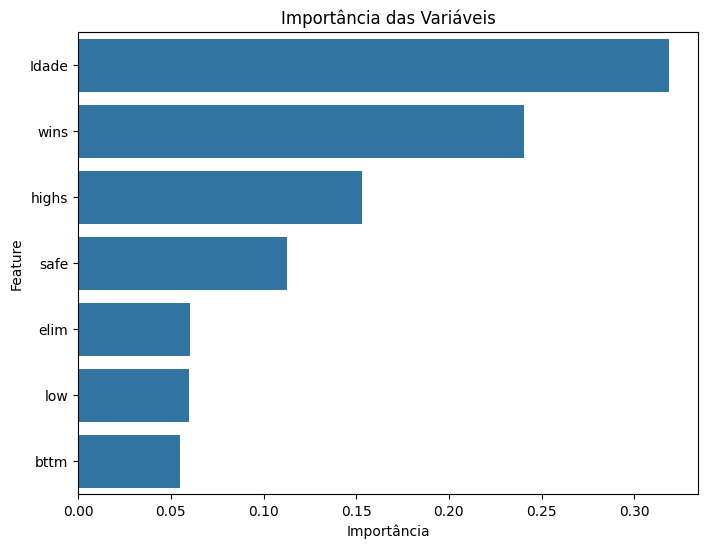

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importância', y='Feature', data=importancias)
plt.title('Importância das Variáveis')
plt.show()

In [28]:
def prever_vencedora(modelo, idade, wins, highs, safe, low, bttm, elim):
    import pandas as pd

    # Certifique-se de que os nomes das colunas correspondem exatamente aos usados durante o treino
    nova_participante = pd.DataFrame([{
        'Idade': idade,
        'wins': wins,
        'highs': highs,
        'safe': safe,
        'low': low,
        'bttm': bttm,
        'elim': elim
    }])

    try:
        previsao = modelo.predict(nova_participante)
        probabilidade = modelo.predict_proba(nova_participante)

        if previsao[0] == 1:
            print("\nResultado: Esta participante TEM potencial para vencer o Drag Race!")
        else:
            print("\nResultado: Esta participante NÃO tem grandes chances de vencer.")

        print("Probabilidade de ganhar: {:.2f}%".format(probabilidade[0][1]*100))
    except Exception as e:
        print(f"Erro ao prever: {e}")


In [36]:
prever_vencedora(modelo, idade=28, wins=124, highs=2234, safe=4, low=1, bttm=0, elim=0)



Resultado: Esta participante NÃO tem grandes chances de vencer.
Probabilidade de ganhar: 44.00%
